Importing the dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE # used to solve class imbalace in the output coloumn
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

Data extraction and understanding

In [4]:
#loading the data

df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The data set have no missing values

In [8]:
#dropping the customerID column as this is not required for modeling

df.drop('customerID', axis=1, inplace=True)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [11]:
# unique values in all the coloumns

for col in df.columns:
  print(f'{col}: {df[col].unique()}')


gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In the above dataFrame tenure, MonthlyCharges and TotalCharges are the only numerical columns.  But TotalCharges is in the form of an object


In [12]:
df[df["TotalCharges"] == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
len(df[df["TotalCharges"] == " "])

11

In the TotalCharges freatures there are 11 values that are stored as empty strings.

Replacing them by 0


In [15]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [16]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [18]:
# understanding the class distribution of the target column

print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**Insights**

1. Removed customer id
2. No Missing values in the dataset
3. Missing values in the TotalCharges column are replaced by 0
4. Class imbalance identified in the target column

**Exploratory Data Analysis(EDA)**

In [19]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Numerical Freature Analysis**

In [21]:
def plot_histograf(df, column_name):
  plt.figure(figsize=(10,5))
  sns.histplot(df[column_name], kde = True)
  plt.title(f"Distribution of {column_name}")

  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  plt.axvline(col_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {col_mean:.2f}')
  plt.axvline(col_median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {col_median:.2f}')

  plt.legend()
  plt.show()

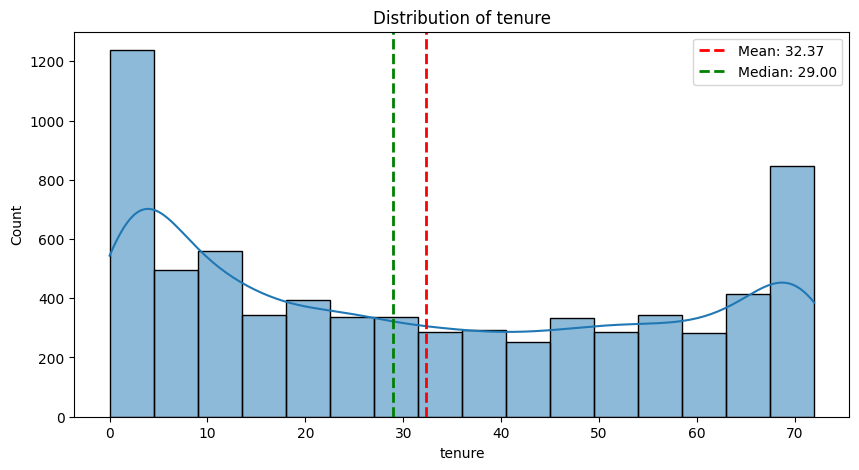

In [22]:
plot_histograf(df, "tenure")

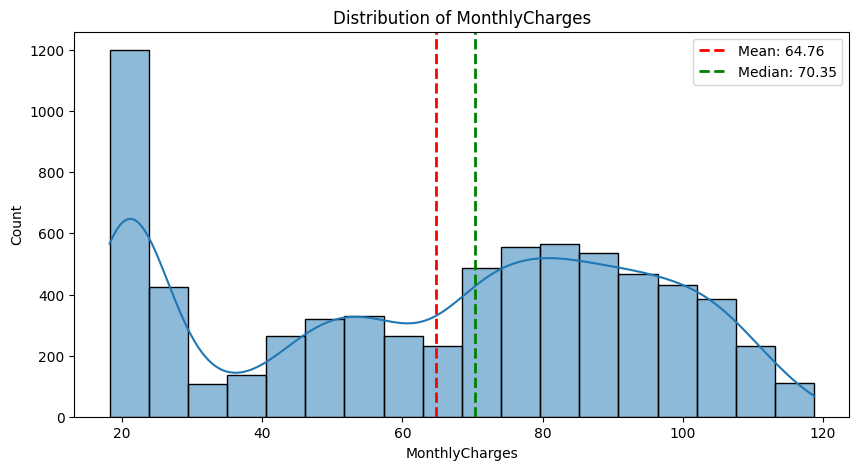

In [23]:
plot_histograf(df, "MonthlyCharges")

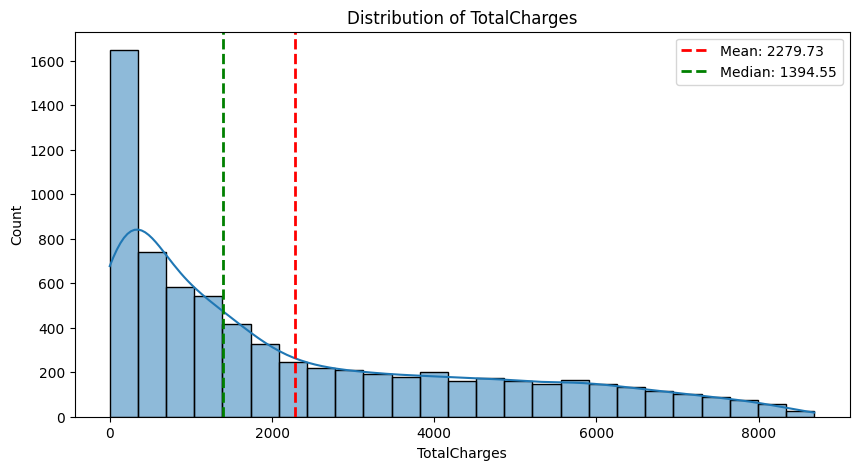

In [24]:
plot_histograf(df, "TotalCharges")

**Box Plot**

In [28]:
def plot_boxplot(df, column_name):
  plt.figure(figsize=(10,5))
  sns.boxplot(y=df[column_name])
  plt.title(f"Boxplot of {column_name}")
  plt.ylabel(column_name)

  plt.show()

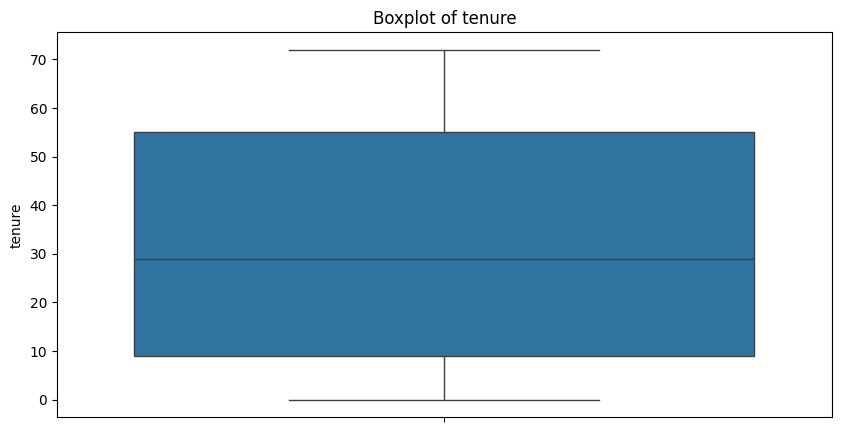

In [29]:
plot_boxplot(df, "tenure")

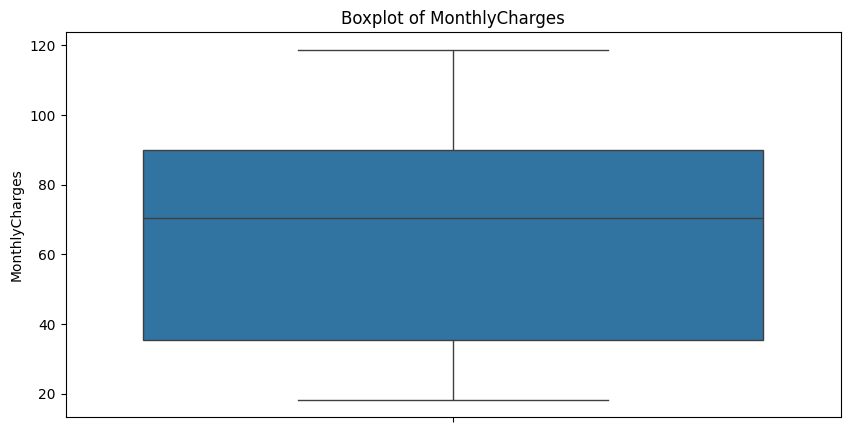

In [30]:
plot_boxplot(df, "MonthlyCharges")

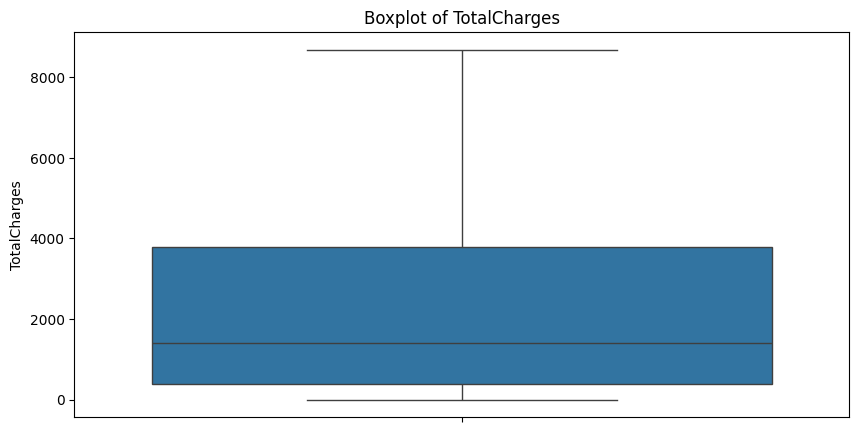

In [31]:
plot_boxplot(df, "TotalCharges")

**Co-Relation HeatMap for numerical columns**

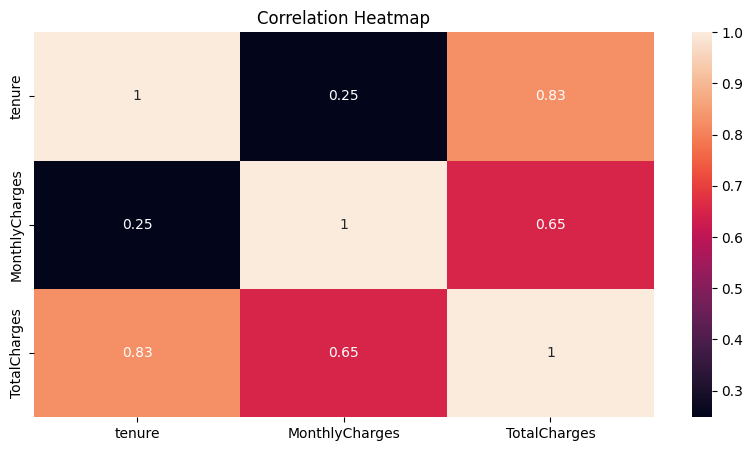

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

**Categorical freatures Analysis**

In [33]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [37]:
object_cols = df.select_dtypes(include="object").columns.to_list()
object_cols = ["SeniorCitizen"] + object_cols
object_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

**CountPlot**

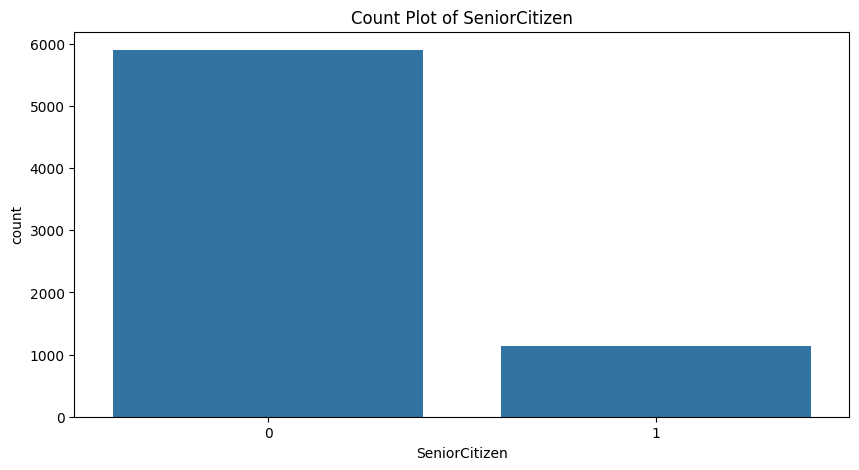

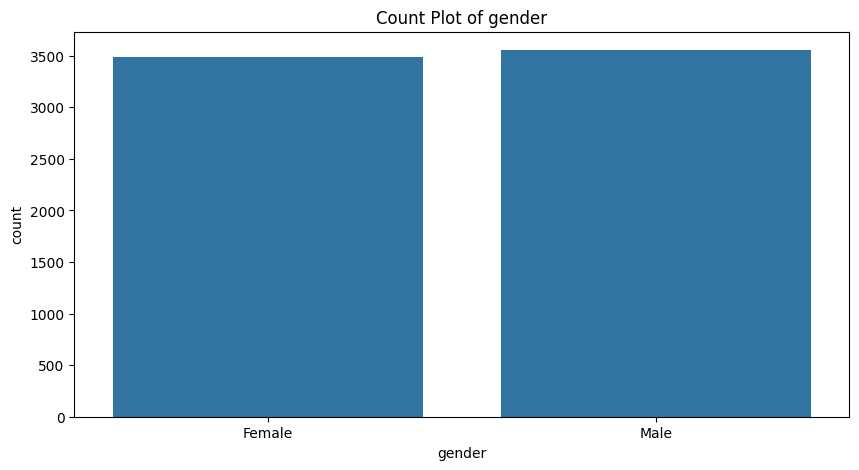

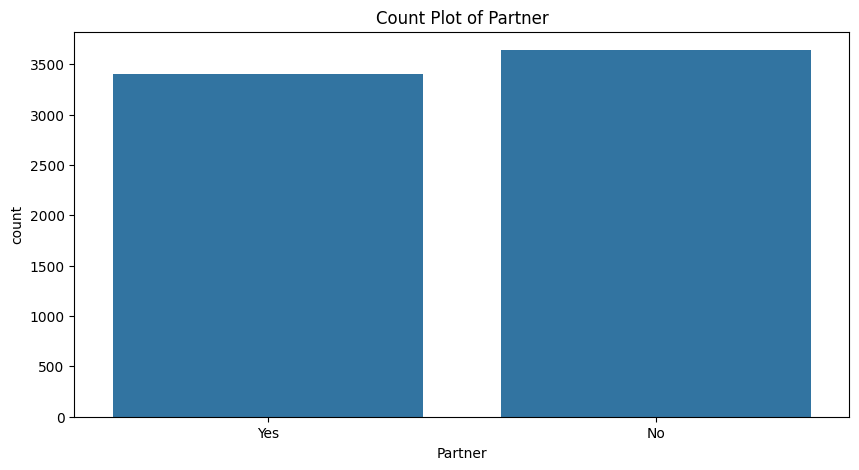

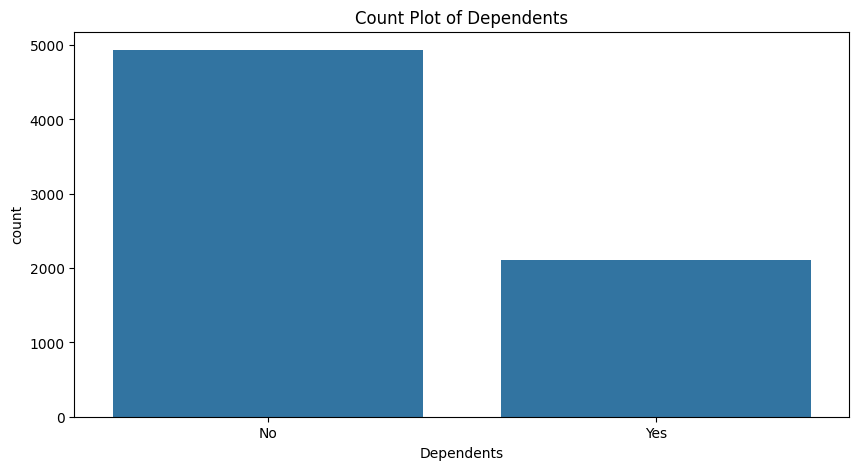

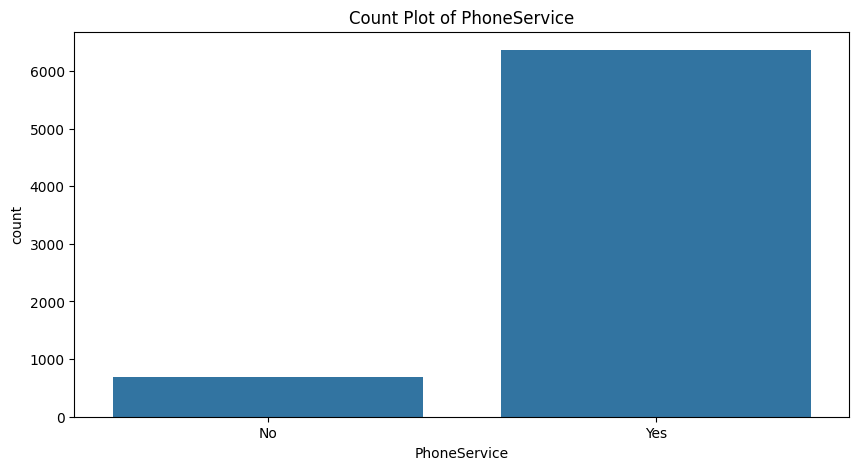

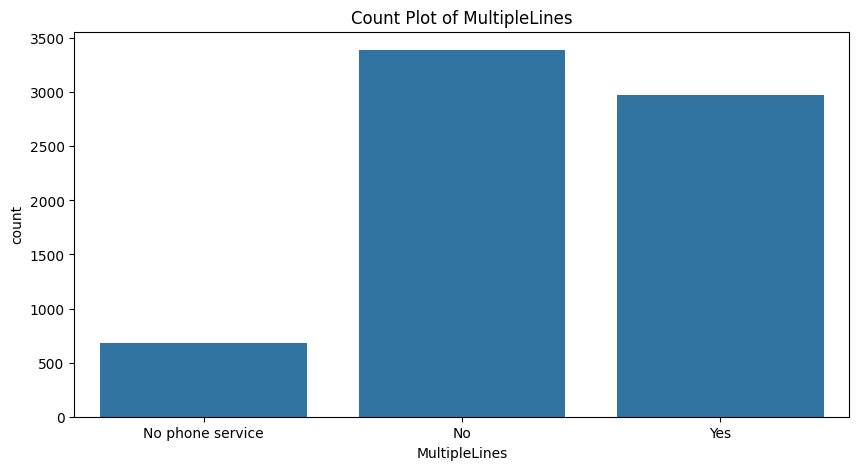

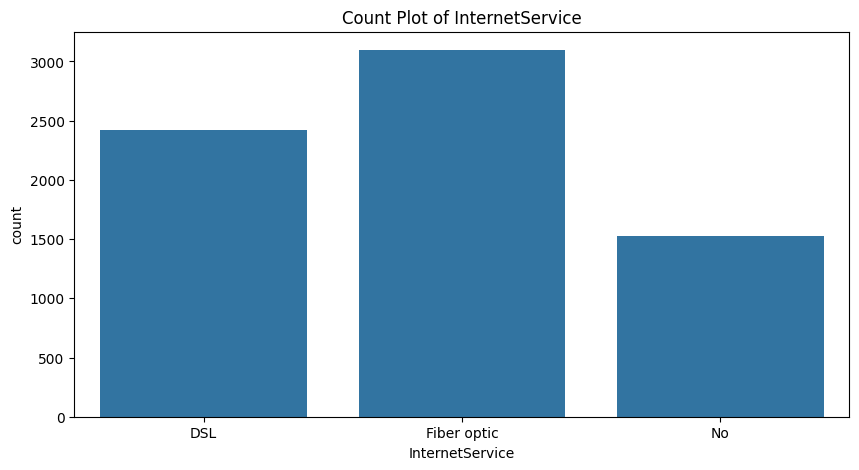

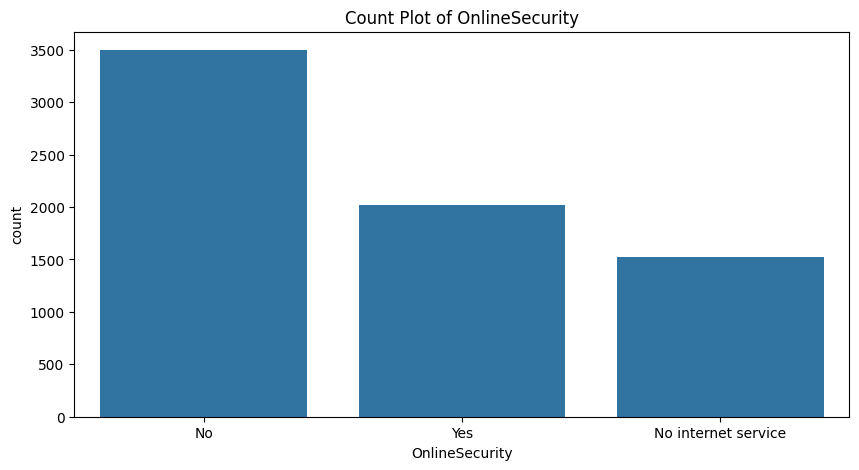

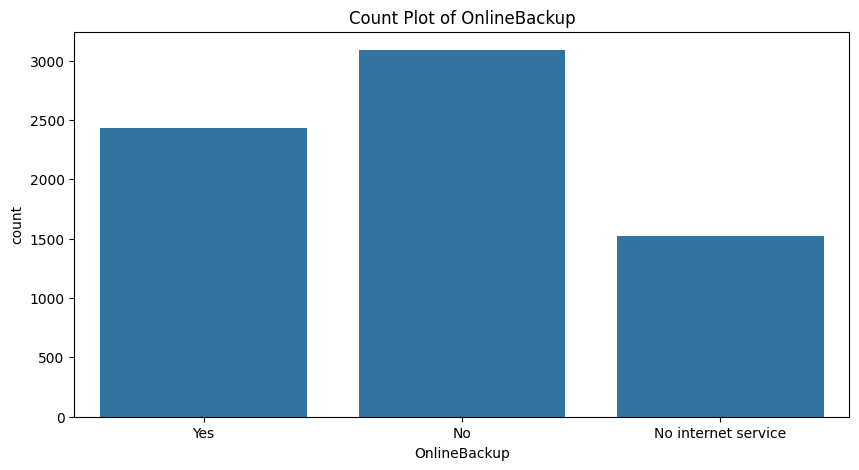

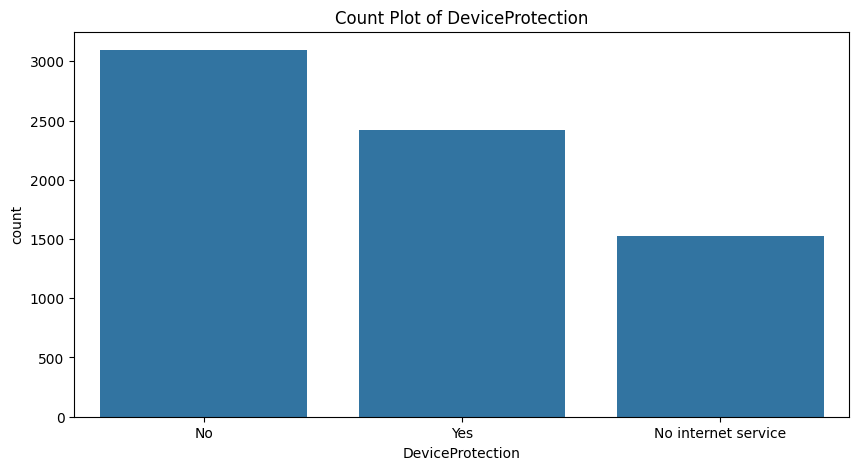

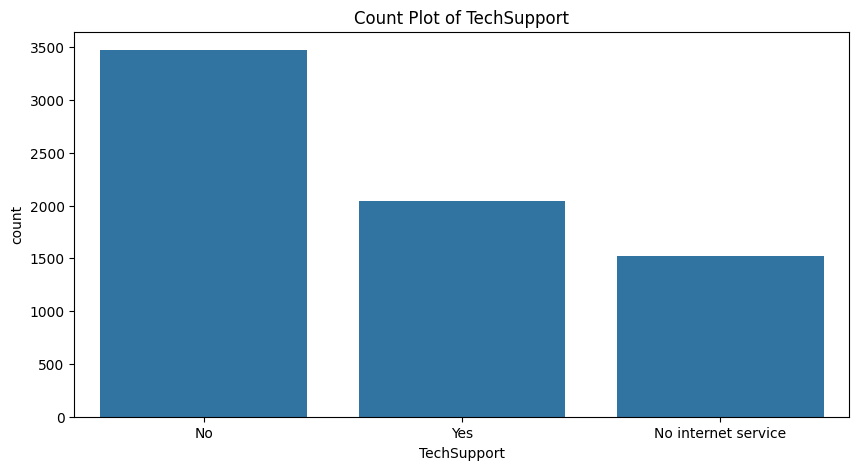

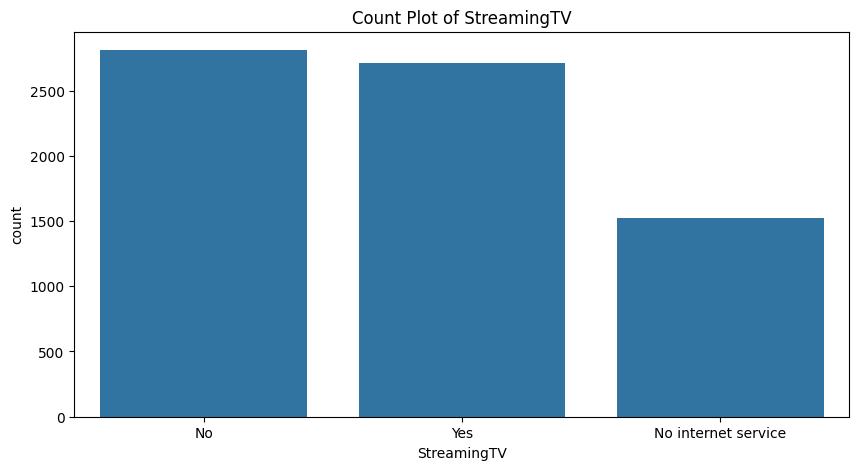

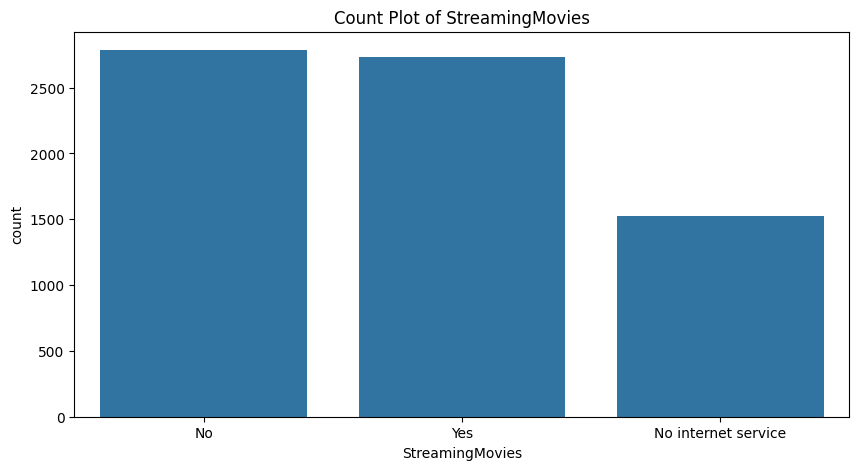

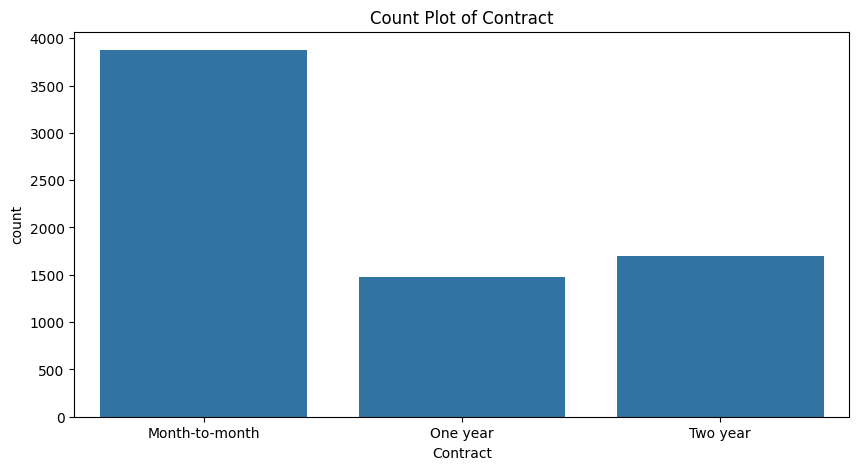

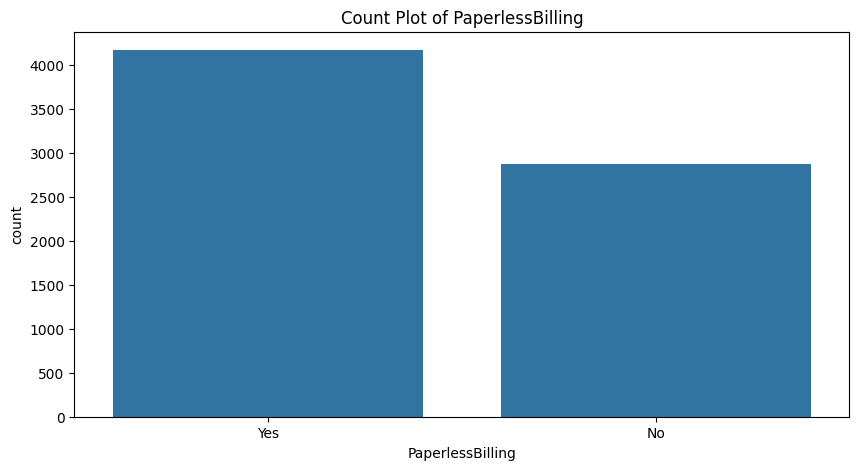

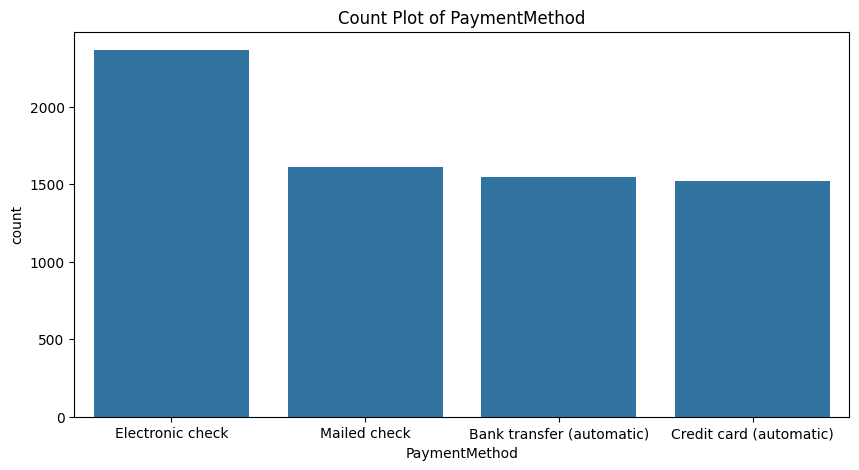

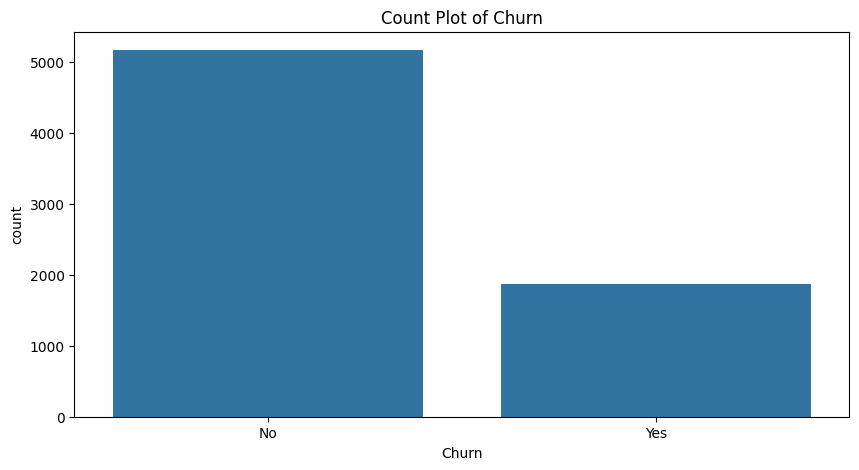

In [38]:
for col in object_cols:
  plt.figure(figsize=(10,5))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

There is a lot of imbalance in the freatures cloumns but we'll be using tree based modles so it dosen't affect the training much.

**Data Preprocessing**

Lable encoding of the target coloumn

In [39]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

/tmp/ipython-input-39-2364848822.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


In [40]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


Lable encoding for other catogerical columns

In [41]:
print(object_cols)

['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [46]:

# this will encode the column and upate the dataframe according to it
encoders = {}

for columns in object_cols:
  lable_encoder = LabelEncoder()
  df[columns] = lable_encoder.fit_transform(df[columns])
  encoders[columns] = lable_encoder


#save the encoders to the pickel file

with open('encoders.pkl', 'wb') as f:
  pickle.dump(encoders, f)

In [47]:
encoders

{'SeniorCitizen': LabelEncoder(),
 'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'Churn': LabelEncoder()}

In [48]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


**Training and test split**

In [49]:
 X = df.drop("Churn", axis=1)
 y = df["Churn"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
print(y_train.shape)

(5634,)


In [55]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


Performing SMOT on the Training data


In [56]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [57]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


**Model Training**

In [58]:
#dict of the models

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}


In [60]:
#dict storing the cross val score
cv_scores ={}


for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5)
  cv_scores[model_name] = scores
  print(f"{model_name} cross val score: {scores}")
  print(f"{model_name} cross val mean score: {scores.mean()}")
  print("-"*70)


Training Decision Tree with default parameters
Decision Tree cross val score: [0.68297101 0.71299094 0.82175227 0.83564955 0.83564955]
Decision Tree cross val mean score: 0.7778026621130524
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross val score: [0.72524155 0.77824773 0.90513595 0.89425982 0.90090634]
Random Forest cross val mean score: 0.8407582789672636
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross val score: [0.70048309 0.75649547 0.90271903 0.89486405 0.90030211]
XGBoost cross val mean score: 0.8309727512880014
----------------------------------------------------------------------


Random Forest returns the highest accuracy compared to other modles

In [61]:
rfclassifier = RandomForestClassifier(random_state=42)
rfclassifier.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

**Evaluation**

In [64]:
y_test_pred = rfclassifier.predict(X_test)

print("Accuracy Score : \n" , accuracy_score(y_test, y_test_pred))
print("-"*70)
print("Classification Report : \n", classification_report(y_test, y_test_pred))
print("-"*70)
print("Confusion Matrix : \n", confusion_matrix(y_test, y_test_pred))

Accuracy Score : 
 0.7785663591199432
----------------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

----------------------------------------------------------------------
Confusion Matrix : 
 [[878 158]
 [154 219]]


In [68]:
# save the trained model as pickel file

model_data = {"model": rfclassifier, "feature_names": X.columns.tolist()}

with open('customer_churn_model.pkl', 'wb') as f:
  pickle.dump(model_data, f)

**Load the saved model and build the predictive system**

In [69]:

with open('customer_churn_model.pkl', 'rb') as f:
  model_data = pickle.load(f)

  loaded_model = model_data["model"]
  feature_names = model_data["feature_names"]

In [70]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [71]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [82]:
input_string = "Female  0       Yes     No      1       No      No phone service        DSL     No      Yes     No      No      No      No      Month-to-month  Yes     Electronic check        29.85   29.85   0"


input_values = ["Female", "0", "Yes", "No", "1", "No", "No phone service", "DSL", "No", "Yes", "No", "No", "No", "No", "Month-to-month", "Yes", "Electronic check", "29.85", "29.85", "0"]


input_values = input_values[:-1]


input_data = dict(zip(feature_names, input_values))

print(input_data)

{'gender': 'Female', 'SeniorCitizen': '0', 'Partner': 'Yes', 'Dependents': 'No', 'tenure': '1', 'PhoneService': 'No', 'MultipleLines': 'No phone service', 'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'No', 'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'MonthlyCharges': '29.85', 'TotalCharges': '29.85'}


In [83]:



def preprocess_input(input_data, encoders):

    input_df = pd.DataFrame([input_data])


    for col in feature_names:
        if col not in input_df.columns:
            input_df[col] = None


    if "TotalCharges" in input_df.columns:
        try:
            input_df["TotalCharges"] = pd.to_numeric(input_df["TotalCharges"], errors='coerce')
        except Exception as e:
            print(f"Error converting TotalCharges: {e}")
            input_df["TotalCharges"] = 0.0


    for col, encoder in encoders.items():

        if col in input_df.columns:

            input_df[col] = input_df[col].apply(lambda x: x if x in encoder.classes_ else encoder.classes_[0] if len(encoder.classes_) > 0 else None)

            input_df[col] = input_df[col].apply(lambda x: encoder.transform([x])[0] if x is not None else None)


    return input_df[feature_names]

with open('encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

processed_input_data = preprocess_input(input_data, encoders)

prediction = loaded_model.predict(processed_input_data)


if prediction[0] == 1:
    print("The customer is likely to churn.")
else:
    print("The customer is not likely to churn.")

The customer is likely to churn.


Future changes:

Hyperparameter Tuning
Down Sampling
Try different model Selection
Overfitting
Startified K fold CV